### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>California Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in California districts</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #2</b></span>

<img src="./imgs/california-flag.png" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the ***Machine Learning Project Checklist by xavecoding***. <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Remove outliers (those with capped values)
- Run the remaining steps of Sprint #1
---

### 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 💽 2. Get the Data

### 2.2. Load the Data

In [3]:
import pandas as pd

housing = pd.read_csv('../datasets/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2.3. Take a quick look at the data structure

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


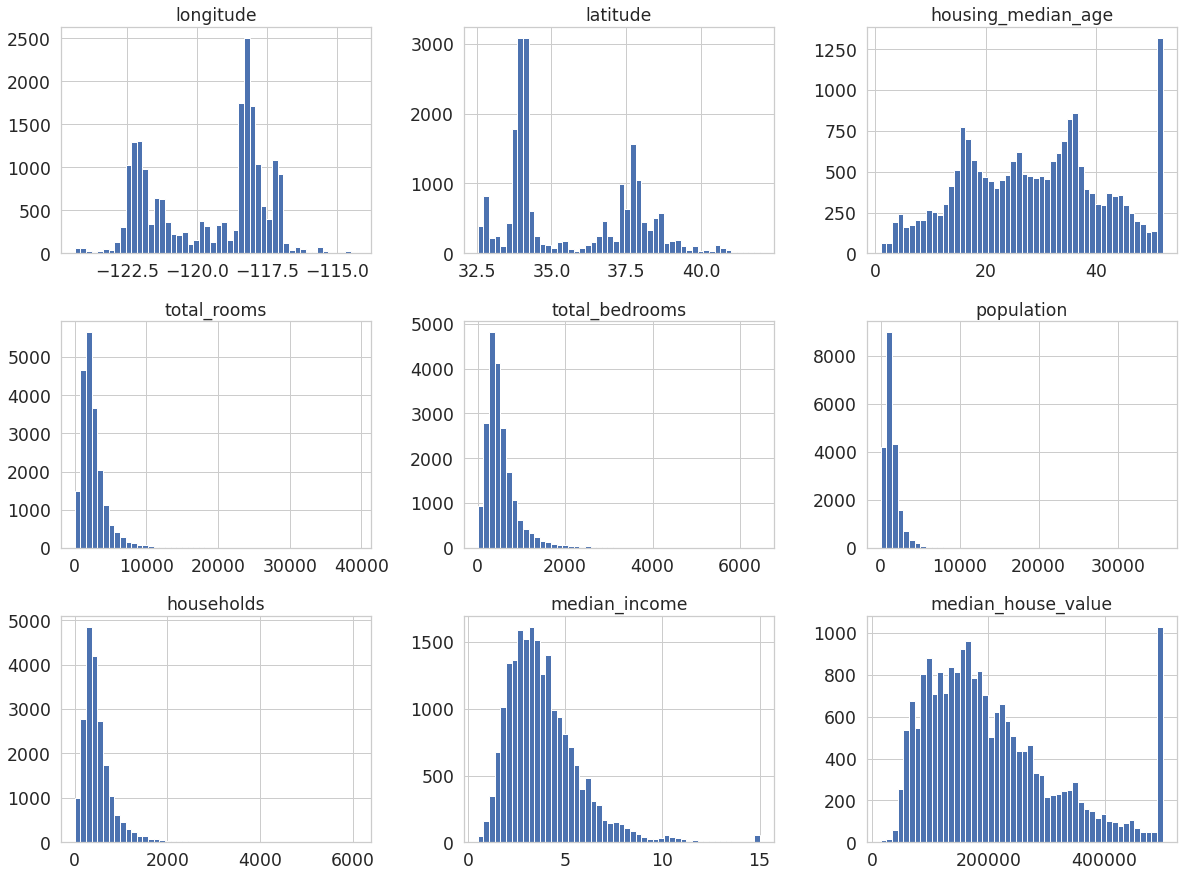

In [6]:
# plot a histogram for each numeric attibute from the dataframe
housing.hist(bins=50, figsize=(20,15))
display()  # just to avoid texts in the notebook output

### 2.4. Create a **`Test Set`**

### Removing outliers with capped values
By looking at the charts above, we can see that the `housing_median_age` and the `median_house_value` has many **capped values** located at their maximum.

#### **`housing_median_age`**

In [7]:
housing['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [10]:
mask = housing['housing_median_age'] > 48
housing.loc[mask, 'housing_median_age'].value_counts()

52.0    1273
50.0     136
49.0     134
51.0      48
Name: housing_median_age, dtype: int64

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

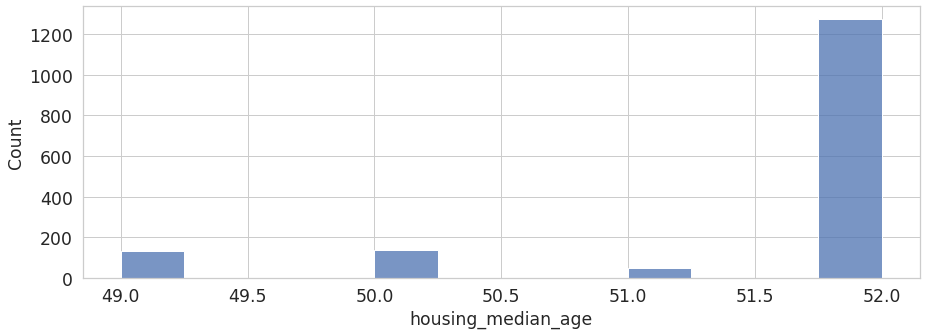

In [11]:
sns.histplot(data=housing[mask], x='housing_median_age')

There are many instances with `housing_median_age` equals to **52**.

#### **`median_house_value`**

In [12]:
housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [14]:
mask = housing['median_house_value'] > 480000
housing.loc[mask, 'median_house_value'].value_counts()

500001.0    965
500000.0     27
483300.0      6
495500.0      3
485000.0      3
           ... 
493200.0      1
494000.0      1
487800.0      1
480100.0      1
486900.0      1
Name: median_house_value, Length: 70, dtype: int64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

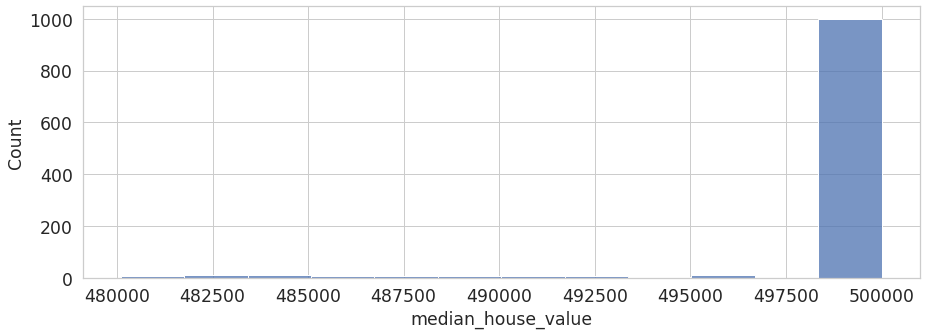

In [15]:
sns.histplot(data=housing[mask], x='median_house_value')

##### **Removing the outliers**

In [16]:
housing_raw = housing.copy()

In [19]:
no_outlier_mask = (housing['housing_median_age'] < 52) & (housing['median_house_value'] < 500001)
housing = housing[no_outlier_mask].copy()

In [20]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Segmenting samples by their `median income`

In [21]:
housing['median_income_group'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5], include_lowest=True)
housing['median_income_group']

0        5
1        5
8        2
15       2
18       2
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: median_income_group, Length: 18572, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [22]:
housing['median_income_group'].value_counts()

3    6660
2    6163
4    3373
5    1641
1     735
Name: median_income_group, dtype: int64

In [23]:
# proportional of the groups in the entire dataset
housing['median_income_group'].value_counts() / len(housing['median_income_group'])

3    0.358604
2    0.331844
4    0.181617
5    0.088359
1    0.039576
Name: median_income_group, dtype: float64

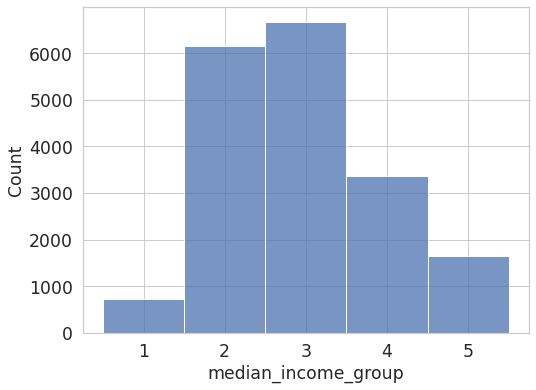

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(housing['median_income_group'])
plt.grid(True)

### Stratified Sampling

In [25]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['median_income_group'], random_state=42)

In [26]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_group
18502,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,340900.0,INLAND,3
4102,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,309200.0,<1H OCEAN,4
18219,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,322300.0,NEAR BAY,4
9797,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,394400.0,NEAR OCEAN,3
8752,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,339500.0,<1H OCEAN,4


In [27]:
housing_train.shape

(14857, 11)

In [28]:
# proportion of the groups in the training set
housing_train['median_income_group'].value_counts() / len(housing_train['median_income_group'])

3    0.358619
2    0.331830
4    0.181598
5    0.088376
1    0.039577
Name: median_income_group, dtype: float64

In [29]:
housing_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_group
4922,-118.25,34.00,41.0,1768.0,475.0,1721.0,474.0,1.3030,90400.0,<1H OCEAN,1
7299,-118.20,33.99,35.0,1705.0,523.0,2252.0,508.0,2.3421,154200.0,<1H OCEAN,2
1145,-121.39,39.61,22.0,2828.0,610.0,986.0,391.0,2.8871,94700.0,INLAND,2
5452,-118.46,34.00,39.0,4098.0,1100.0,2054.0,1053.0,2.9180,345600.0,<1H OCEAN,2
9995,-121.03,39.14,10.0,3138.0,524.0,1275.0,511.0,4.0775,164500.0,INLAND,3


In [30]:
housing_test.shape

(3715, 11)

In [31]:
# proportion of the groups in the testing set
housing_test['median_income_group'].value_counts() / len(housing_test['median_income_group'])

3    0.358546
2    0.331898
4    0.181696
5    0.088291
1    0.039569
Name: median_income_group, dtype: float64

In [32]:
# removing the attribute 'median_income_group'
housing_train = housing_train.drop(columns=['median_income_group'])
housing_test = housing_test.drop(columns=['median_income_group'])

#### **Saving datasets**

In [34]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
housing_train.to_csv('../datasets/housing_train_sprint-2.csv', index=False)
housing_test.to_csv('../datasets/housing_test_sprint-2.csv', index=False)

## 🧹 3. Data Cleaning

### 3.1. Missing values

In [37]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 18502 to 13540
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14857 non-null  float64
 1   latitude            14857 non-null  float64
 2   housing_median_age  14857 non-null  float64
 3   total_rooms         14857 non-null  float64
 4   total_bedrooms      14709 non-null  float64
 5   population          14857 non-null  float64
 6   households          14857 non-null  float64
 7   median_income       14857 non-null  float64
 8   median_house_value  14857 non-null  float64
 9   ocean_proximity     14857 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [38]:
# missing the `total_bedrooms` values with its median

housing_train_clean = housing_train.copy()

median_total_bedrooms = housing_train_clean['total_bedrooms'].median()
housing_train_clean['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

In [39]:
housing_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14857 entries, 18502 to 13540
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14857 non-null  float64
 1   latitude            14857 non-null  float64
 2   housing_median_age  14857 non-null  float64
 3   total_rooms         14857 non-null  float64
 4   total_bedrooms      14857 non-null  float64
 5   population          14857 non-null  float64
 6   households          14857 non-null  float64
 7   median_income       14857 non-null  float64
 8   median_house_value  14857 non-null  float64
 9   ocean_proximity     14857 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


## 📊 4. Explore the Data
We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

### 4.1. Visualizing Geographical Data

In [40]:
### To install plotly
# pip install plotly
# jupyter labextension install jupyterlab-plotly

### Plotly Maps
# https://plotly.com/python/scattermapbox/
# To plot on Mapbox maps with Plotly you may need a Mapbox account and a public Mapbox Access Token - https://www.mapbox.com/studio

import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(housing_train_clean, lat="latitude", lon="longitude", color="median_house_value", size="population",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

ModuleNotFoundError: No module named 'plotly'

When removing the most expensive houses in the dataset -- those with *capped values* at \\$ 500,001.00 -- our map has changed just a little bit, nothing to worry.

The (obvious) findings keep the same:
- There small and big districts (in term of population) close and far from the coast
- The most expensive houses are very close to the coast

### 4.2. Looking for Correlations

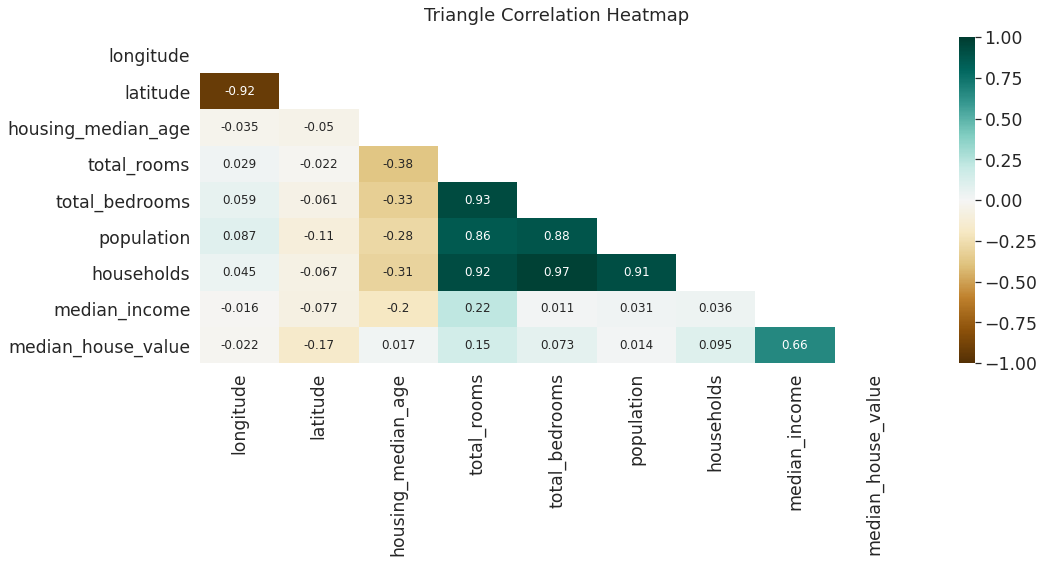

In [42]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_train_clean.corr(), dtype=bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(housing_train_clean.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [43]:
housing_train_clean.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.663135
total_rooms           0.151353
households            0.095126
total_bedrooms        0.073440
housing_median_age    0.017499
population            0.013621
longitude            -0.022043
latitude             -0.171698
Name: median_house_value, dtype: float64

The correlation has slightly changed. The _most promising attribute_ to predict the `median house value` keeps being the **`median income`**.

<Figure size 1080x576 with 0 Axes>

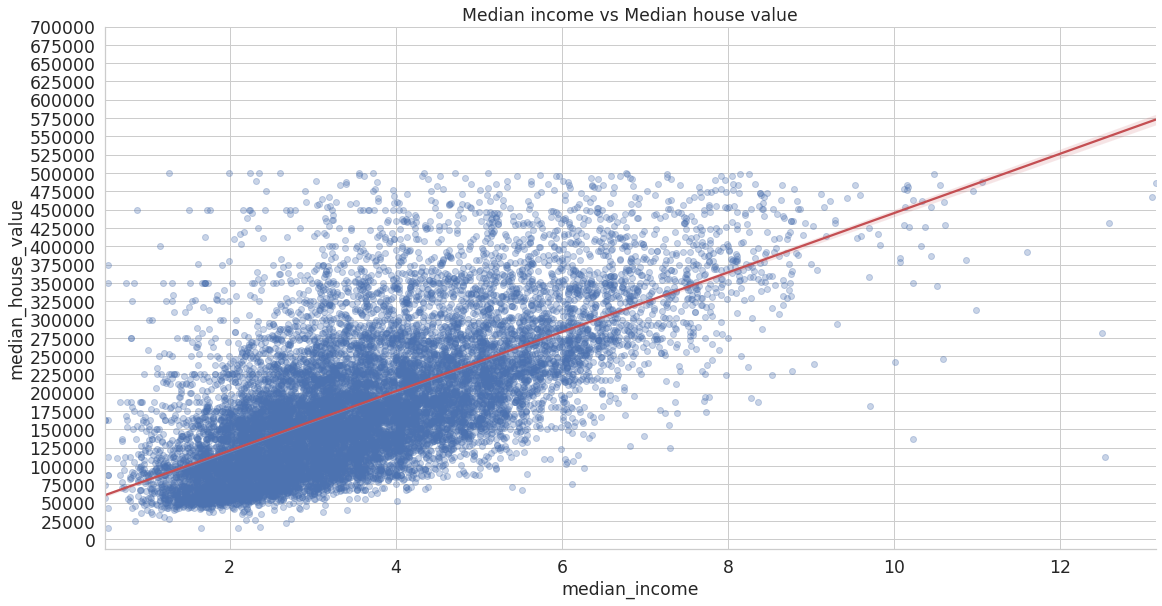

In [44]:
plt.figure(figsize=(15, 8))
sns.lmplot(data=housing_train_clean, x="median_income", y="median_house_value", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 700001, 25000))
plt.grid(True)
plt.title('Median income vs Median house value')
display()

This plot is better than that from Sprint #1.

Some findings:
- The _correlation_ is **strong**: see the regression line and the _upward trend_
- There is a horizontal line around \\$350,000, another around \\$450,000, perhaps a few more.
  - You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.
  - For now, we will not remove them.

In [45]:
# Zoom in the stats for the target outcome
housing_train_clean['median_house_value'].describe()

count     14857.000000
mean     189616.954769
std       95754.331957
min       14999.000000
25%      115600.000000
50%      171200.000000
75%      243000.000000
max      500000.000000
Name: median_house_value, dtype: float64

## 🛠️ 5. Prepare the Data

In [46]:
housing_train_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18502,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,340900.0,INLAND
4102,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,309200.0,<1H OCEAN
18219,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,322300.0,NEAR BAY
9797,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,394400.0,NEAR OCEAN
8752,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,339500.0,<1H OCEAN


#### **Separating the independent variables (features) and the _dependent variable_ (target outcome)**

In [47]:
housing_train_pre = housing_train_clean.drop(columns=['median_house_value'])
housing_train_target = housing_train_clean['median_house_value'].copy()

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Remember to merge the <i>features</i> and the <i>target outcome</i> into a single dataframe before saving it to disk.</td>
</tr>
</table><br/><br/>

### 5.1. Categorical Variabel Encoding

In [48]:
# one hot encoding by pandas
housing_train_pre = pd.get_dummies(data=housing_train_pre, columns=['ocean_proximity'])
housing_train_pre.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
18502,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,0,1,0,0,0
4102,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,1,0,0,0,0
18219,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,0,0,0,1,0
9797,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,0,0,0,0,1
8752,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,1,0,0,0,0


#### **Saving the pre-processed training set**

In [50]:
housing_train_pre_saving = housing_train_pre.copy()
housing_train_pre_saving['median_house_value'] = housing_train_target
housing_train_pre_saving.to_csv('../datasets/housing_train_pre_sprint-2.csv', index=False)

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [51]:
X_train = housing_train_pre.values
y_train = housing_train_target.values

### 6.1. Training the Models

In [52]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # default parameters
linear_regressor.fit(X_train, y_train)

LinearRegression()

### 6.3. Evaluating on the Training Set

### **Prediction**

In [53]:
y_train_pred = linear_regressor.predict(X_train)

#### **Evaluation**

In [54]:
r2_score = linear_regressor.score(X_train, y_train)
print(f'R² = {r2_score}')

R² = 0.6243118707667812


In [55]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE = {rmse}')

RMSE = 58689.11366350199


Although the RMSE has decreased (\\$58,689) compared to the Sprint #1 (\\$69,050), the current model *is not necessarily better*. <br/>
The reason is that we now have a _smaller dataset_ that has generated _different_ training and testing sets from Sprint #1.

However, we still have a high error on the training set, which indicates **underfitting**.

### **Visual Analysis**

##### **Prediction vs Real**

Text(0.5, 1.0, 'Median housing value - Prediction vs Real')

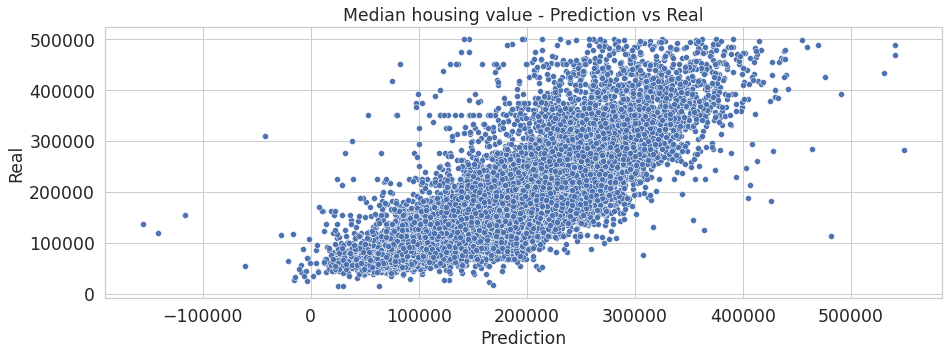

In [56]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real')

##### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity**.

<img src='../imgs/residual-analysis.png' width=600/>

In [57]:
residual = y_train - y_train_pred

Text(0.5, 1.0, 'Median housing value - Prediction vs Residual')

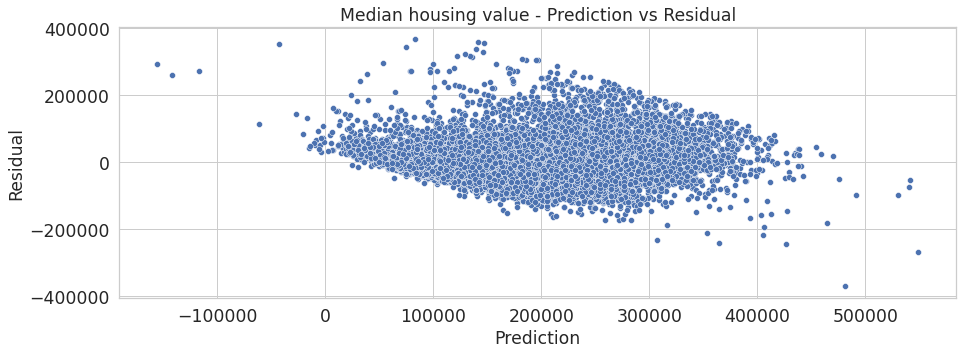

In [58]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual')

we have removed that diagonal top line in this plot. However, the model still **does not** meet the **homoscedasticity**.

<AxesSubplot:ylabel='Count'>

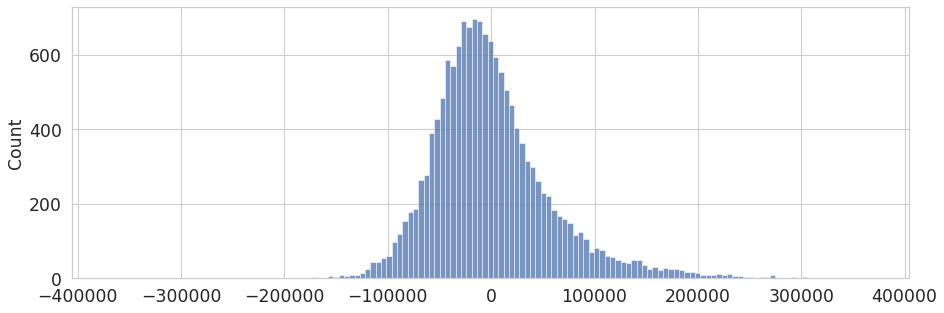

In [59]:
sns.histplot(residual)

The residual keeps roghly following a _normal distribution_.